In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)


In [2]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [3]:
train = pd.read_csv("./data/train.csv", encoding="latin-1")
test = pd.read_csv("./data/test.csv", encoding="latin-1")


In [4]:
check_df(train)


**********************************************************************
******************************* Shape ********************************
**********************************************************************
(2822, 11)
**********************************************************************
******************************* Types ********************************
**********************************************************************
ID                      int64
DiagnosticICD10Code    object
SurgeryGroup           object
AnesthesiaType         object
SurgeryName            object
Age                     int64
Sex                    object
Service                object
DoctorID                int64
AnaesthetistID          int64
ElapsedTime(second)     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
     I

In [5]:
check_df(test)


**********************************************************************
******************************* Shape ********************************
**********************************************************************
(1211, 10)
**********************************************************************
******************************* Types ********************************
**********************************************************************
ID                      int64
DiagnosticICD10Code    object
SurgeryGroup           object
AnesthesiaType         object
SurgeryName            object
Age                     int64
Sex                    object
Service                object
DoctorID                int64
AnaesthetistID          int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
     ID DiagnosticICD10Code SurgeryG

In [6]:
app_train = train.copy()
app_test = test.copy()
app_train.drop_duplicates(inplace=True)
app_train.drop_duplicates(subset=["ID"], keep='first', inplace=True)


In [7]:
train[train.ID == 2273]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1221,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6474
1871,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6472


In [8]:
app_train[app_train.ID == 2273]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1221,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6474


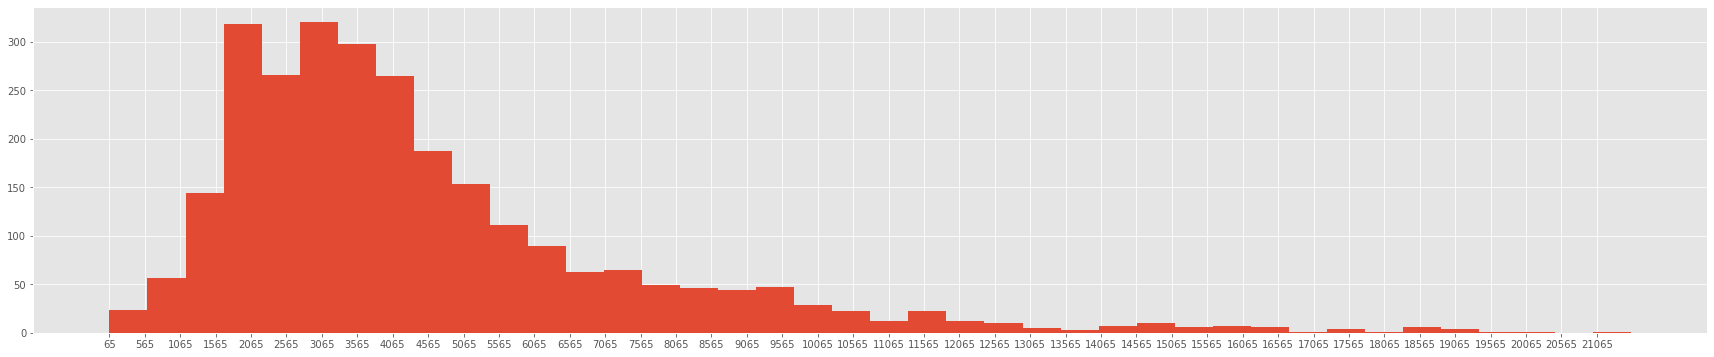

In [9]:
plt.figure(figsize=(30,6))
plt.style.use('ggplot')
plt.hist(app_train["ElapsedTime(second)"], bins=40)
plt.xticks(range(min(app_train["ElapsedTime(second)"]), max(app_train["ElapsedTime(second)"])+1, 500))
plt.show()


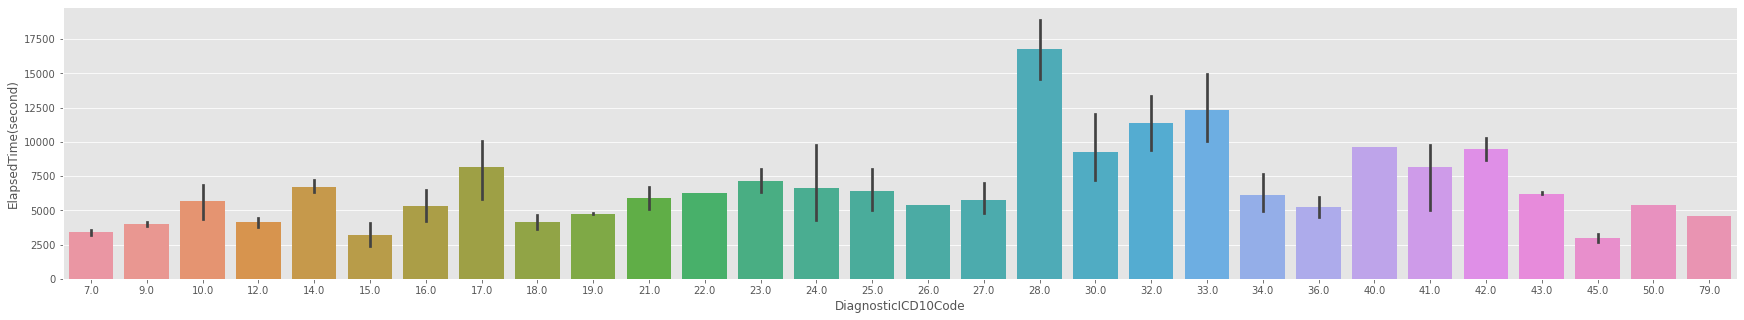

In [45]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["DiagnosticICD10Code"].str.len(), y="ElapsedTime(second)", data=train)
plt.show()

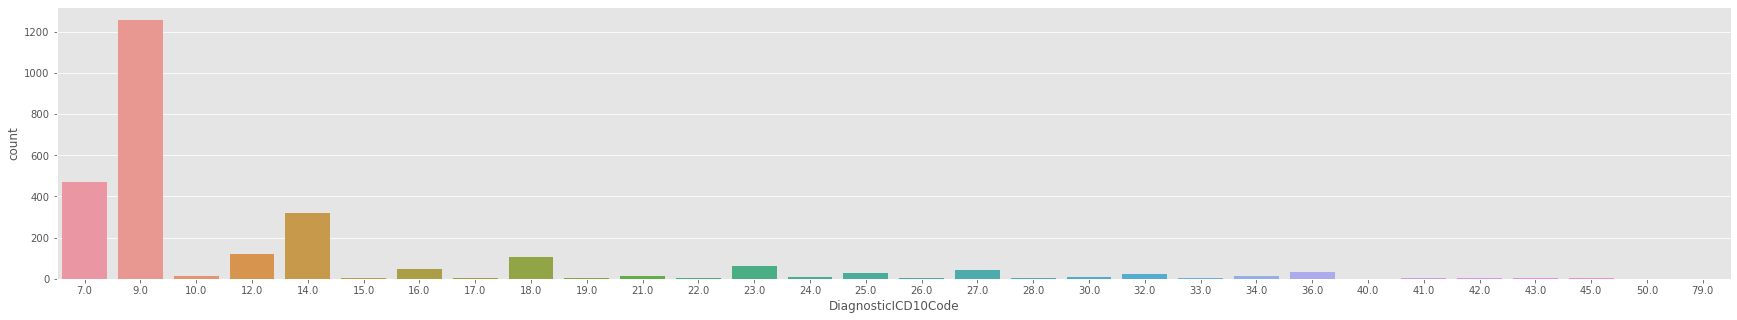

In [46]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=train["DiagnosticICD10Code"].str.len(), data=train)
plt.show()

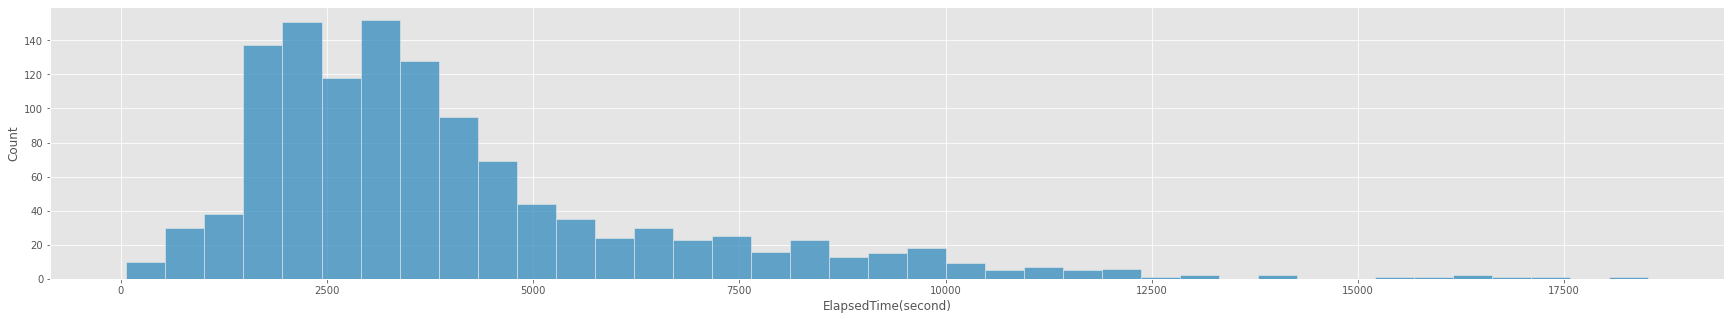

In [10]:
df = app_train[app_train['DiagnosticICD10Code'].str.len()==9]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(df["ElapsedTime(second)"]);


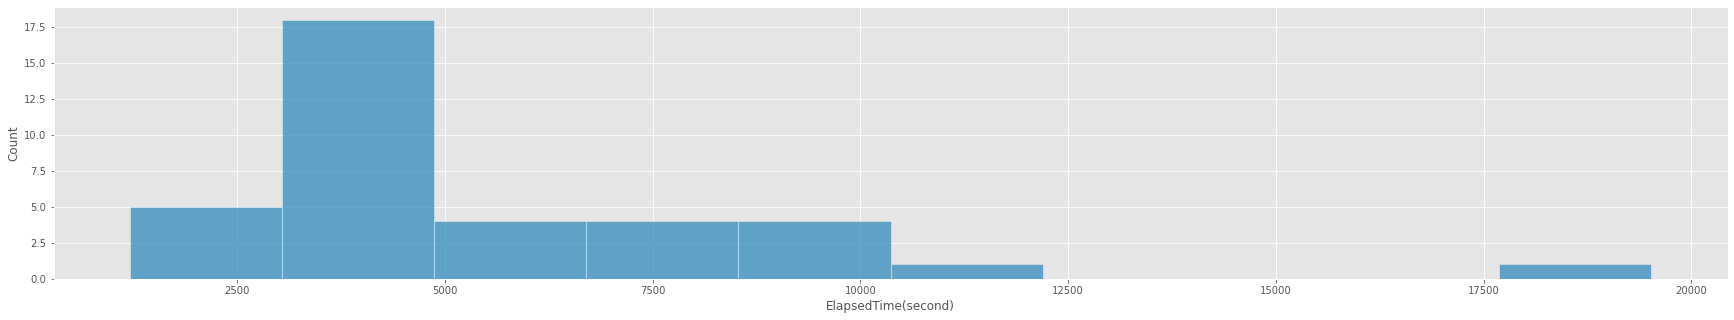

In [11]:
df = app_train[app_train['DiagnosticICD10Code'].str.len()==27]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(df["ElapsedTime(second)"]);


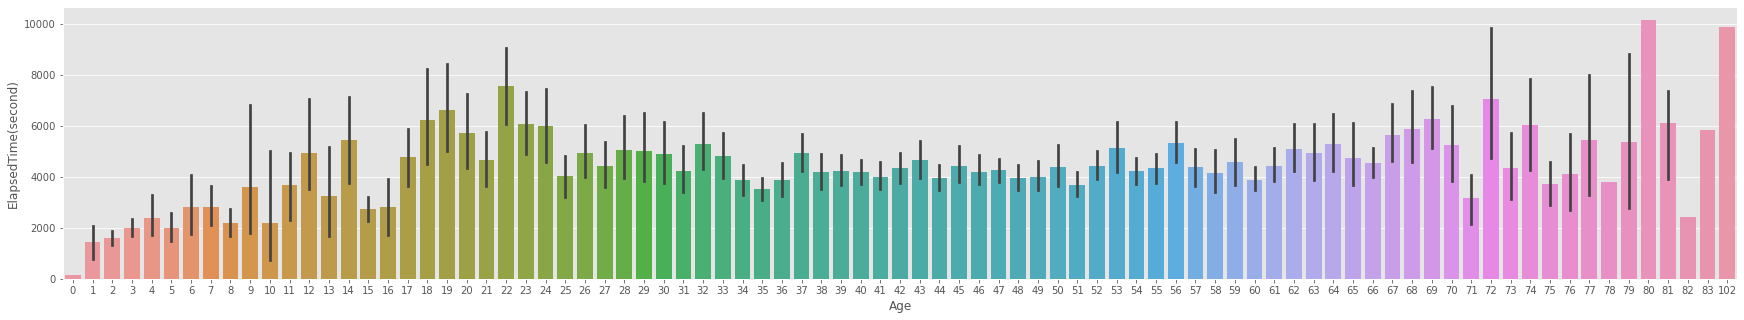

In [12]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["Age"], y="ElapsedTime(second)", data=train)
plt.show()


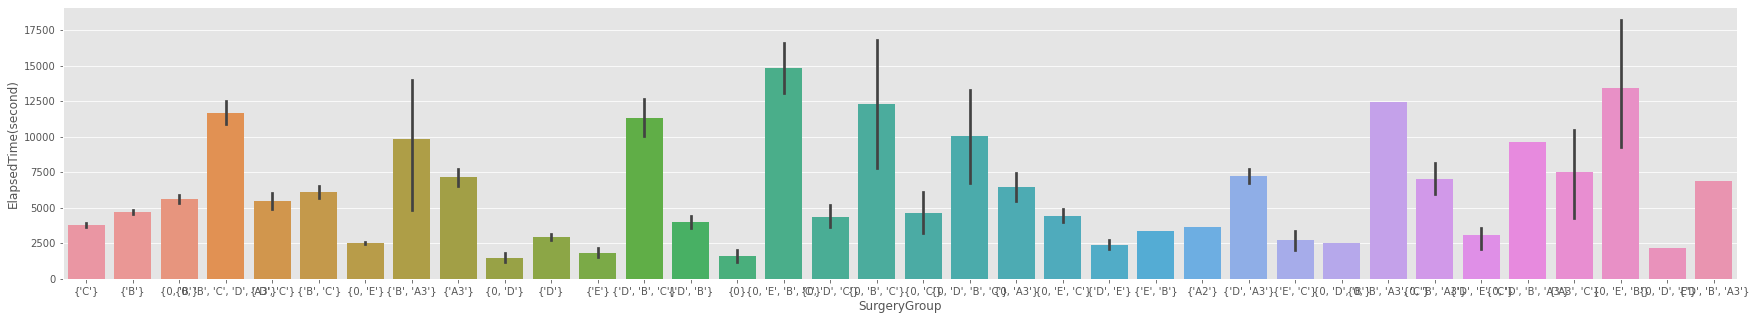

In [13]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["SurgeryGroup"], y="ElapsedTime(second)", data=app_train)
plt.show()


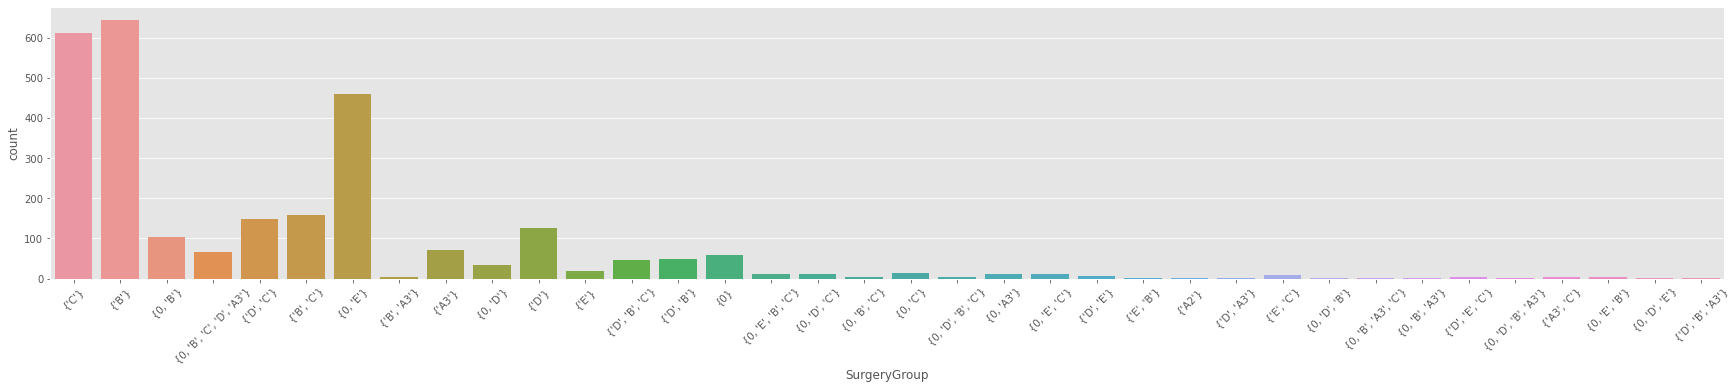

In [14]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=app_train["SurgeryGroup"], data=app_train)
plt.xticks(rotation=45)
plt.show()


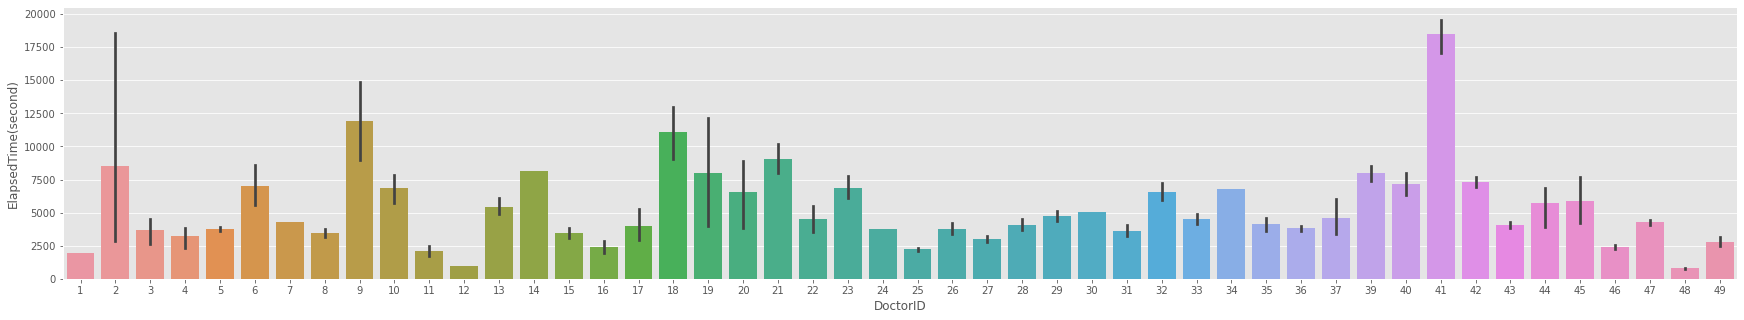

In [15]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["DoctorID"], y="ElapsedTime(second)", data=app_train)
plt.show()


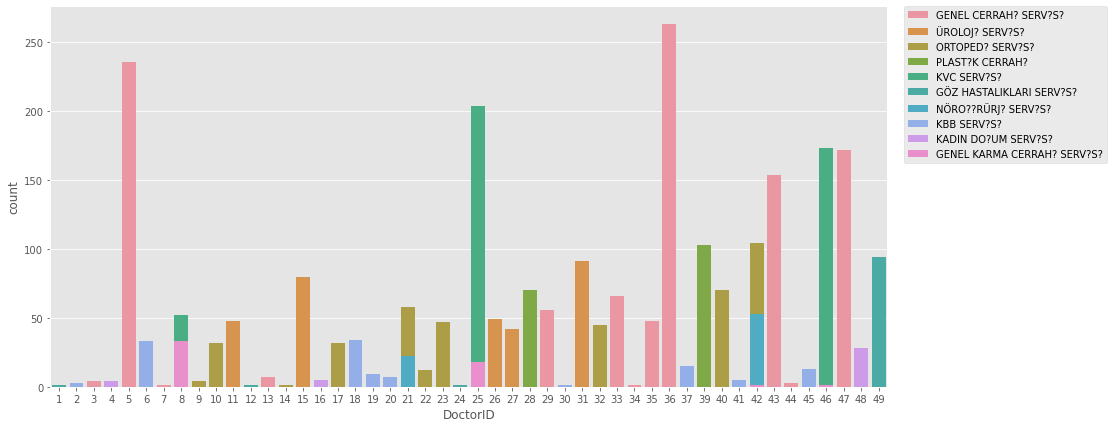

In [16]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x=app_train["DoctorID"], hue="Service", dodge=False, data=app_train)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);
plt.show()


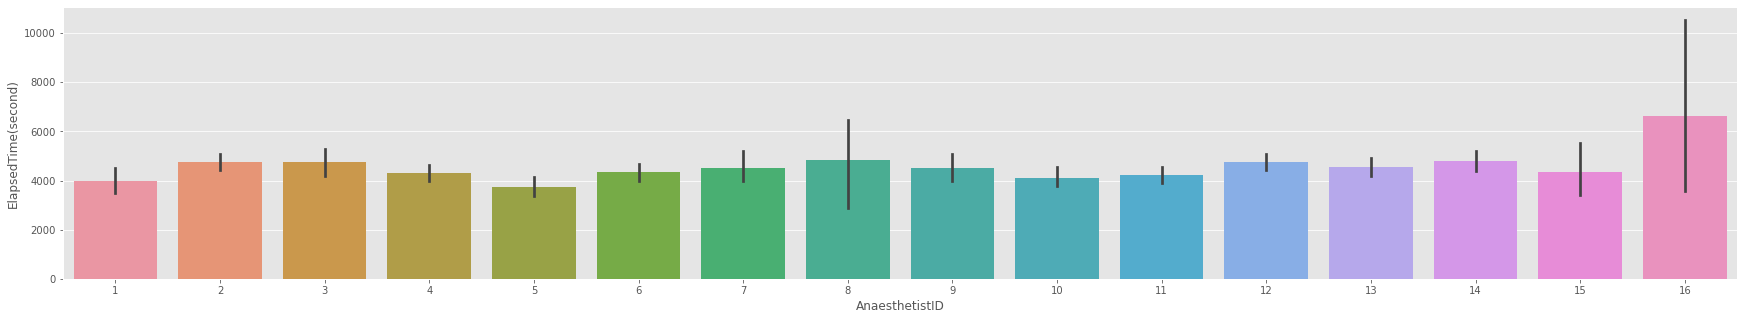

In [17]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["AnaesthetistID"], y="ElapsedTime(second)", data=app_train)
plt.show()


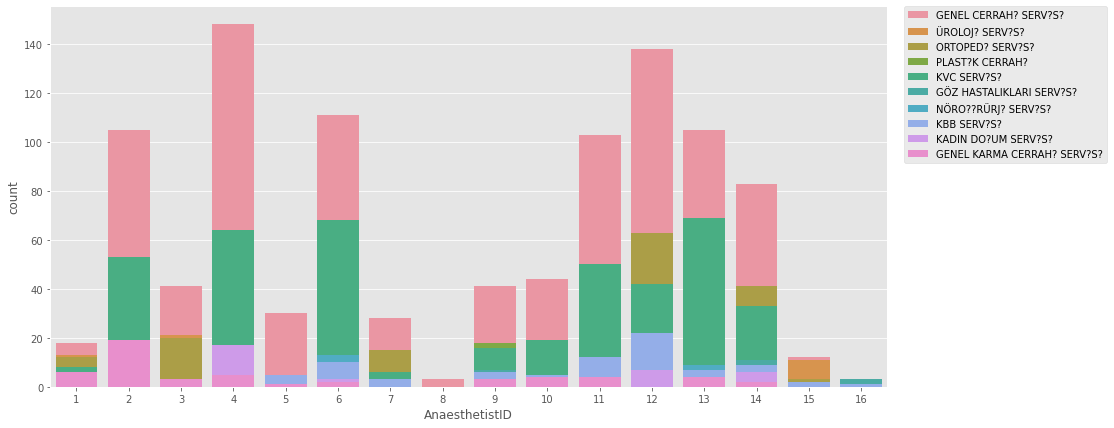

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x=app_train["AnaesthetistID"], hue="Service", dodge=False, data=app_train)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);
plt.show()


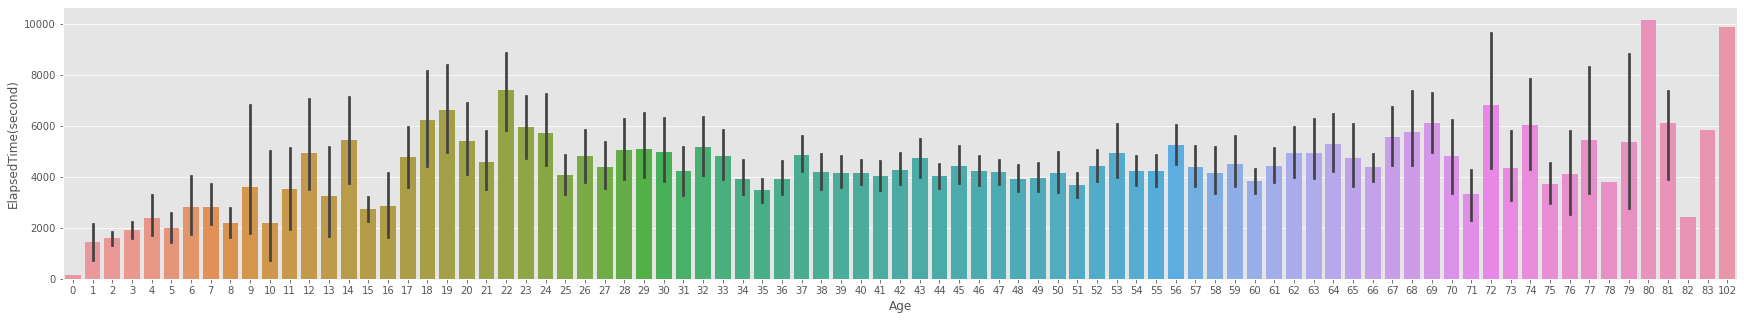

In [19]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["Age"], y="ElapsedTime(second)", data=app_train)
plt.show()


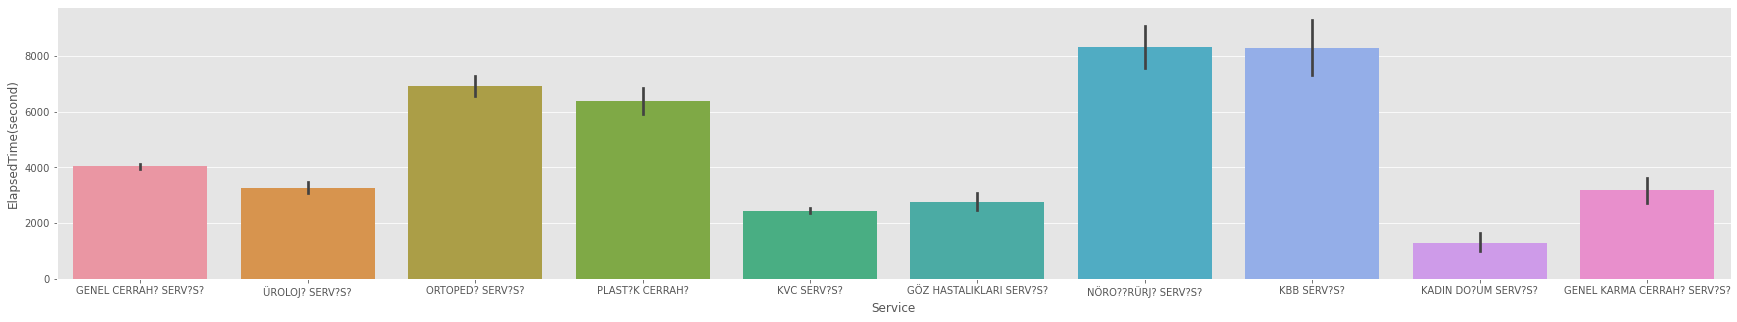

In [20]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["Service"], y="ElapsedTime(second)", data=app_train)
plt.show()


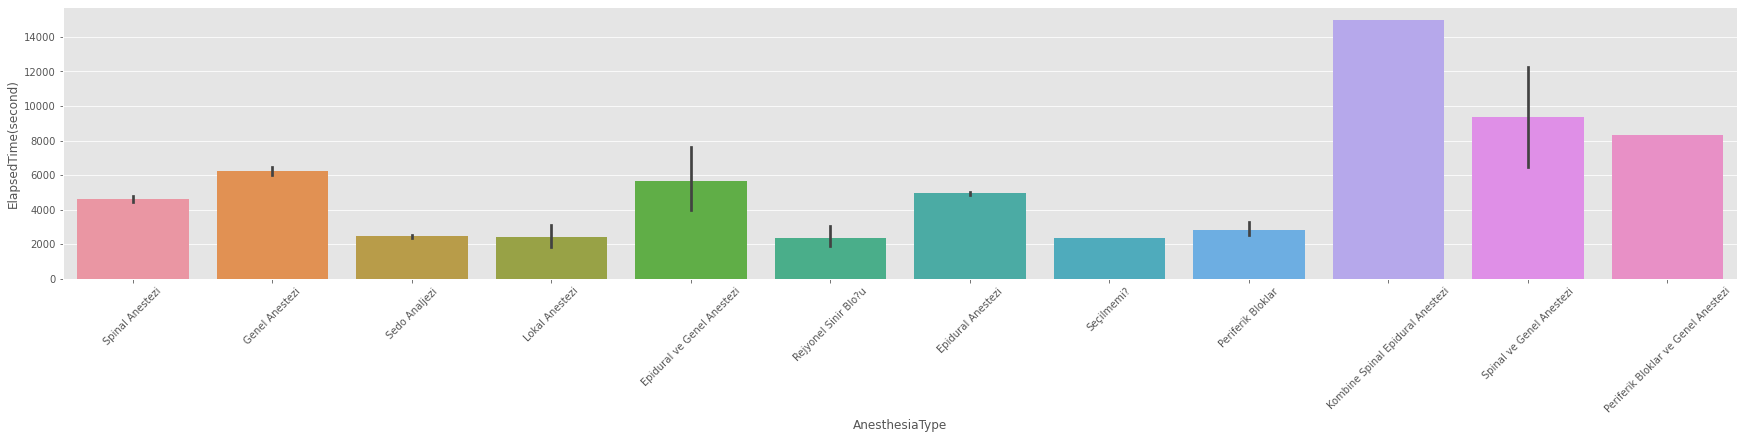

In [21]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="AnesthesiaType", y="ElapsedTime(second)", data=app_train)
plt.xticks(rotation=45)
plt.show()


In [24]:
fig = px.pie(app_train, values= app_train.index, names='Sex', title='Gender Percentage', width= 600, height=300)
fig.show()

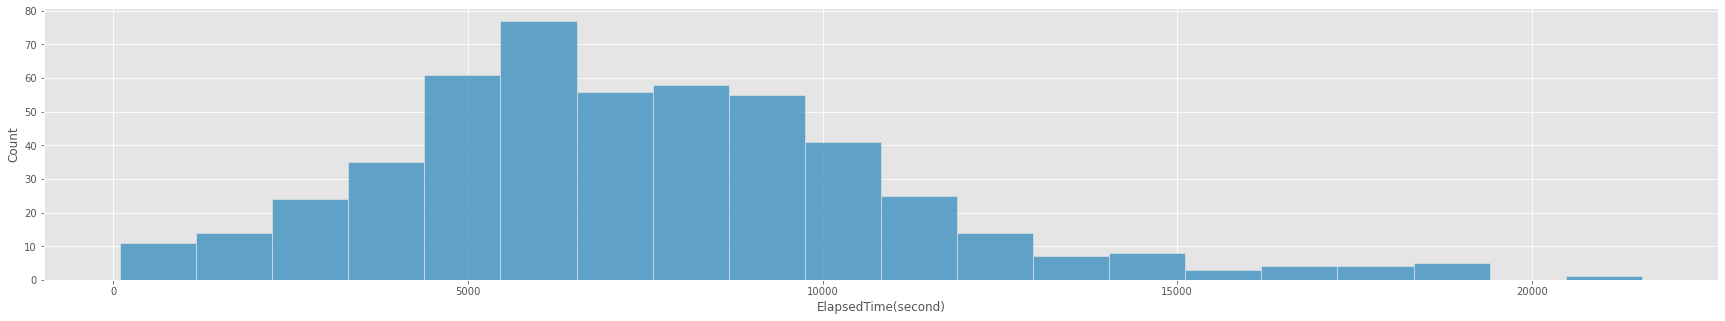

In [25]:
df = app_train[app_train["DiagnosticICD10Code"].str.contains('M', na=False)]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df)
plt.show()


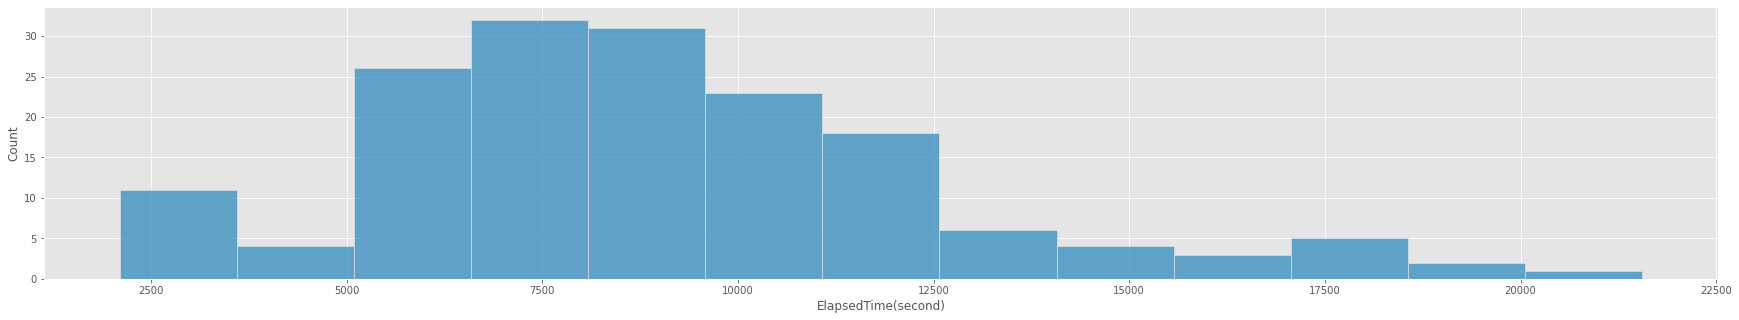

In [28]:
df = app_train[app_train["SurgeryGroup"].str.contains('A', na=False)]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x= "ElapsedTime(second)", data=df)
plt.show()


In [29]:
app_train_clean = app_train.copy()
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str[1:-1]
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str.replace("'","")
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str[1:-1]
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str.replace("'","")
app_train_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [30]:
app_test_clean = app_test.copy()
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str[1:-1]
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str.replace("'","")
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str[1:-1]
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str.replace("'","")
app_test_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13


In [31]:
app_train_clean['Any_NaN_Diagnos'] = app_train_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)
app_test_clean['Any_NaN_Diagnos'] = app_test_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)

In [32]:
def clean_diagnosis(diagnosis):
    if isinstance(diagnosis, str):
        return set(diagnosis.replace(', nan', '').replace(' nan,', '').replace('nan,', '').replace(' ', '').split(','))
    else:
        return diagnosis

app_train_clean['Diagnos_Clean'] = app_train_clean['DiagnosticICD10Code'].apply(clean_diagnosis)
app_test_clean['Diagnos_Clean'] = app_test_clean['DiagnosticICD10Code'].apply(clean_diagnosis)

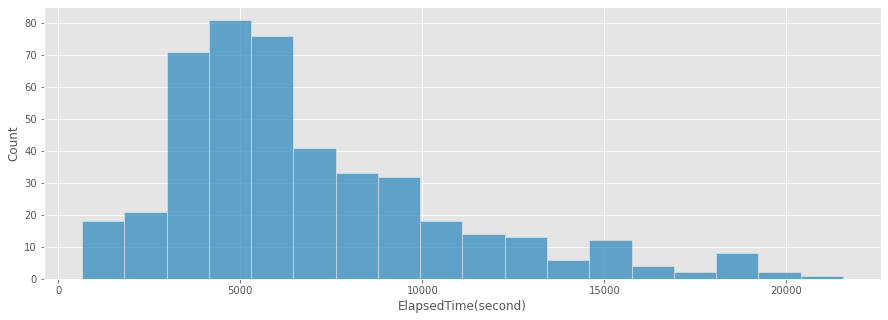

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(x="ElapsedTime(second)", data=app_train_clean[app_train_clean["Any_NaN_Diagnos"]==1])
plt.show()

In [37]:
map_dict = {'0': 1, 'E': 1, 'D': 2, 'C': 3, 'B': 4, 'A3': 5, 'A2': 6, 'A1': 7}
mapper = lambda x: [map_dict[val.strip()] for val in x.split(',')]
app_train_clean["SurgeryGroup_Encode"] = app_train_clean["SurgeryGroup"].apply(mapper)
app_test_clean["SurgeryGroup_Encode"] = app_test_clean["SurgeryGroup"].apply(mapper)

In [38]:
app_train_clean["SurgeryGroup_Sum"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_train_clean["SurgeryGroup_Count"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_train_clean["SurgeryGroup_Avg"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_train_clean["SurgeryGroup_Std"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_train_clean["SurgeryGroup_Max"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_train_clean["SurgeryGroup_Min"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))

In [39]:
app_test_clean["SurgeryGroup_Sum"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_test_clean["SurgeryGroup_Count"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_test_clean["SurgeryGroup_Avg"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_test_clean["SurgeryGroup_Std"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_test_clean["SurgeryGroup_Max"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_test_clean["SurgeryGroup_Min"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))

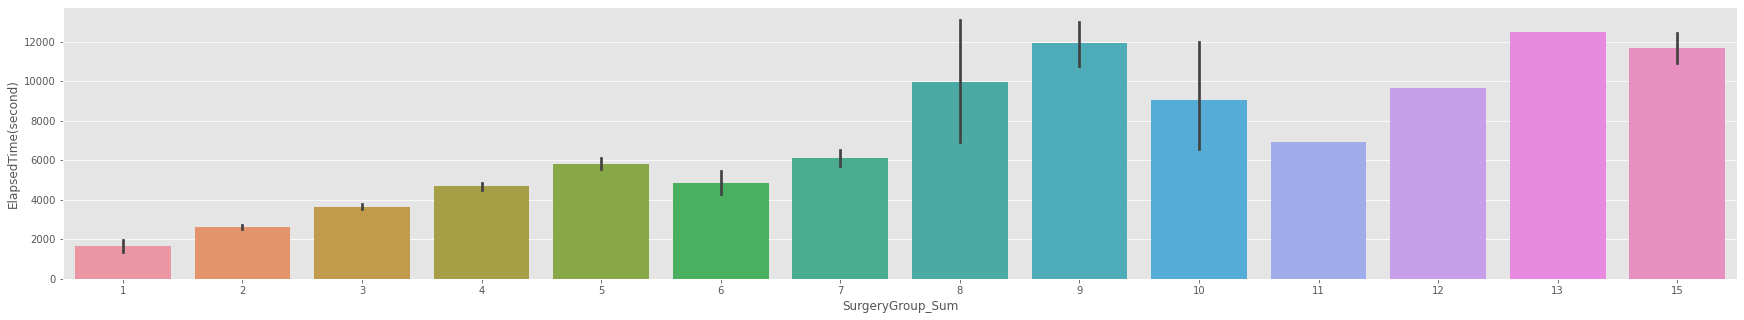

In [43]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="SurgeryGroup_Sum", y="ElapsedTime(second)", data=app_train_clean)
plt.show()


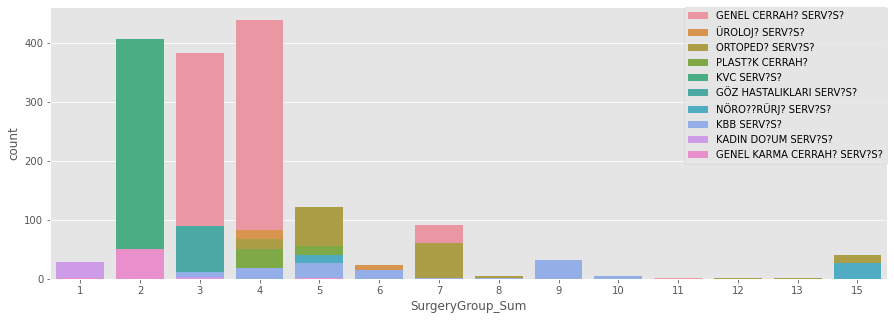

In [44]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="SurgeryGroup_Sum", hue="Service", dodge=False, data=app_train_clean)
plt.legend(loc='upper right', borderaxespad=0);
plt.show()


In [47]:
app_train_clean[app_train_clean["ID"]==3228]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
92,3228,"K21.9, J15.9, N30.0, N21.1, N30.9, L30.3, N40,...",B,Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581,0,"{L30.3, N30.9, N32.0, N40, J15.9, N21.1, M19.9...",[4],4,1,4.0,0.0,4,4


In [48]:
app_train_clean[app_train_clean["ID"]==245]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
2014,245,"K21.9, J15.9, R31, N30.0, M19.9, I10",C,Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,5415,0,"{M19.9, J15.9, K21.9, N30.0, R31, I10}",[3],3,1,3.0,0.0,3,3


In [52]:
app_train_clean.loc[92, "Diagnos_Clean"] = np.nan
app_train_clean.loc[2014, "Diagnos_Clean"] = np.nan

In [53]:
app_train_clean["Diagnos_Clean"] = app_train_clean["Diagnos_Clean"].fillna('')
app_train_clean['Diagnos_Clean'] = app_train_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))

In [55]:
app_test_clean.loc[787, "Diagnos_Clean"] = np.nan
app_test_clean.loc[285, "Diagnos_Clean"] = np.nan

In [56]:
app_test_clean["Diagnos_Clean"] = app_test_clean["Diagnos_Clean"].fillna('')
app_test_clean['Diagnos_Clean'] = app_test_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))

In [58]:
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
import itertools


# function to generate all possible combinations with first characters for a set of diagnoses
def generate_combinations_first_char(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag[0] for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# function to generate all possible combinations with all characters for a set of diagnoses
def generate_combinations_all_char(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations_first_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_first_{j+1}'
        app_train_clean.at[i, col_name] = combo

for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations_all_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_all_{j+1}'
        app_train_clean.at[i, col_name] = combo

app_train_clean.head()

  0%|          | 0/2714 [00:00<?, ?it/s]

  0%|          | 0/2714 [00:00<?, ?it/s]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,combination_first_1,combination_first_2,combination_first_3,combination_first_4,combination_first_5,combination_first_6,combination_first_7,combination_first_8,combination_first_9,combination_first_10,combination_first_11,combination_first_12,combination_first_13,combination_first_14,combination_first_15,combination_first_16,combination_first_17,combination_first_18,combination_first_19,combination_first_20,combination_first_21,combination_first_22,combination_first_23,combination_first_24,combination_first_25,combination_first_26,combination_first_27,combination_first_28,combination_first_29,combination_first_30,combination_first_31,combination_all_1,combination_all_2,combination_all_3,combination_all_4,combination_all_5,combination_all_6,combination_all_7,combination_all_8,combination_all_9,combination_all_10,combination_all_11,combination_all_12,combination_all_13,combination_all_14,combination_all_15,combination_all_16,combination_all_17,combination_all_18,combination_all_19,combination_all_20,combination_all_21,combination_all_22,combination_all_23,combination_all_24,combination_all_25,combination_all_26,combination_all_27,combination_all_28,combination_all_29,combination_all_30,combination_all_31
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N20.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K80.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M51.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M48.0, M51.1]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M48.0,M51.1,M48.0-M51.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations_first_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_first_{j+1}'
        app_test_clean.at[i, col_name] = combo

for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations_all_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_all_{j+1}'
        app_test_clean.at[i, col_name] = combo

app_test_clean.head()

  0%|          | 0/1211 [00:00<?, ?it/s]

  0%|          | 0/1211 [00:00<?, ?it/s]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,combination_first_1,combination_first_2,combination_first_3,combination_first_4,combination_first_5,combination_first_6,combination_first_7,combination_first_8,combination_first_9,combination_first_10,combination_first_11,combination_first_12,combination_first_13,combination_first_14,combination_first_15,combination_first_16,combination_first_17,combination_first_18,combination_first_19,combination_first_20,combination_first_21,combination_first_22,combination_first_23,combination_first_24,combination_first_25,combination_first_26,combination_first_27,combination_first_28,combination_first_29,combination_first_30,combination_first_31,combination_all_1,combination_all_2,combination_all_3,combination_all_4,combination_all_5,combination_all_6,combination_all_7,combination_all_8,combination_all_9,combination_all_10,combination_all_11,combination_all_12,combination_all_13,combination_all_14,combination_all_15,combination_all_16,combination_all_17,combination_all_18,combination_all_19,combination_all_20,combination_all_21,combination_all_22,combination_all_23,combination_all_24,combination_all_25,combination_all_26,combination_all_27,combination_all_28,combination_all_29,combination_all_30,combination_all_31
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,[H26.9],[3],3,1,3.0,0.0,3,3,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H26.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,[L05.9],[3],3,1,3.0,0.0,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L05.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,[M50.1],[5],5,1,5.0,0.0,5,5,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M50.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,[S42.2],[4],4,1,4.0,0.0,4,4,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S42.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,[I82],"[1, 1]",2,2,1.0,0.0,1,1,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


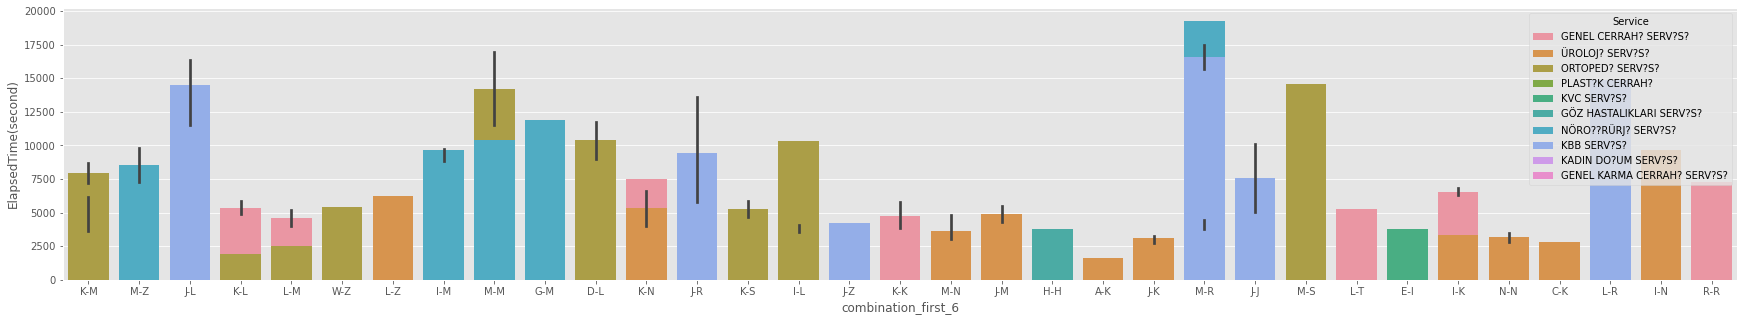

In [73]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="combination_first_6", y="ElapsedTime(second)", hue="Service", dodge=False, data=app_train_clean)
plt.show()

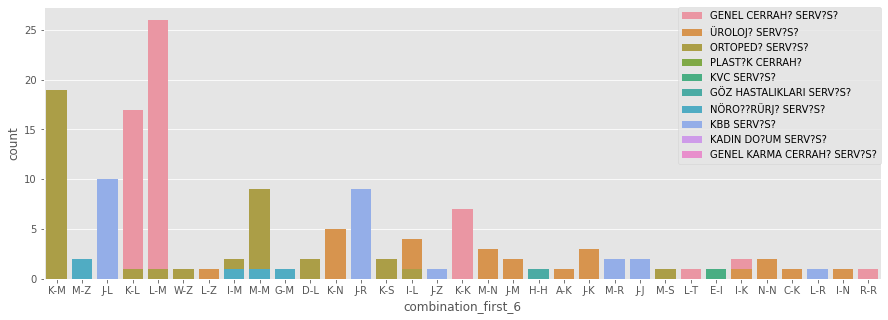

In [76]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="combination_first_6", hue="Service", dodge=False, data=app_train_clean)
plt.legend(loc='upper right', borderaxespad=0);
plt.show()

In [77]:
app_train_encode = app_train_clean.copy()
app_test_encode = app_test_clean.copy()


In [78]:
app_train_encode['Age_Range'] = pd.cut(app_train_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])
app_test_encode['Age_Range'] = pd.cut(app_test_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])


In [84]:
train_ohe_cols = list(app_train_encode.columns[3:5]) + list(app_train_encode.columns[6:10]) + list(app_train_encode.columns[20:])
test_ohe_cols = list(app_test_encode.columns[3:5]) + list(app_test_encode.columns[6:10]) + list(app_test_encode.columns[19:])


In [87]:
set(train_ohe_cols) - set(test_ohe_cols)

set()

In [ ]:
app_train_encode = pd.get_dummies(app_train_encode, columns=train_ohe_cols)
app_test_encode = pd.get_dummies(app_test_encode, columns=test_ohe_cols)
app_train_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID", "index"], inplace = True)
app_test_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)



In [94]:
app_train_encode = pd.get_dummies(app_train_encode, columns=train_ohe_cols)

In [99]:
app_test_encode = pd.get_dummies(app_test_encode, columns=test_ohe_cols)

In [104]:
app_train_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)
app_test_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)

In [106]:
filtered_cols = app_train_encode.filter(like='gangrensiz veya obstr')
new_col = filtered_cols.sum(axis=1)
app_train_encode["SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz_merged"] = new_col
app_train_encode = app_train_encode.drop(columns=filtered_cols.columns)

In [110]:
filtered_cols = app_test_encode.filter(like='gangrensiz veya obstr')
new_col = filtered_cols.sum(axis=1)
app_test_encode["SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz_merged"] = new_col
app_test_encode = app_test_encode.drop(columns=filtered_cols.columns)

In [115]:
target = app_train_encode["ElapsedTime(second)"]
app_train_encode, app_test_encode = app_train_encode.align(app_test_encode, join = 'inner', axis = 1)

In [122]:
app_train_encode["ElapsedTime(second)"] = target


In [151]:
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re


regex = re.compile(r"\[|\]|<", re.IGNORECASE)
y = app_train_encode["ElapsedTime(second)"]
X = app_train_encode.drop(columns=["ElapsedTime(second)"])
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

mse_errs = []
rmse_errs = []
mae_errs = []
r2_errs = []

models = []

kf = KFold(n_splits=10, shuffle=True, random_state= 42)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)

    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    

    model.fit(X_train, y_train, eval_set = [(X_val, y_val), (X_train, y_train)], eval_metric='rmse')
    
    preds = model.predict(X_val)
    
    rmse_err = mean_squared_error(y_val, preds, squared=False)
    print("Fold RMSE: ", rmse_err)
    rmse_errs.append(rmse_err)

    mse_err = mean_squared_error(y_val, preds)
    print("Fold MSE: ", mse_err)
    mse_errs.append(mse_err)

    mae_err = mean_absolute_error(y_val, preds)
    print("Fold MAE: ", mae_err)
    mae_errs.append(mae_err)

    r2_err = r2_score(y_val, preds)
    print("Fold R2: ", r2_err)
    r2_errs.append(r2_err)

    models.append(model)
    
    print("\n", "*"*70, "\n")

import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                        pd.Series(np.mean(importance,axis=0),name="Importance")],
                        axis=1).sort_values(by='Importance',
                                            ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - XGB Average of Folds"
)
fig.show()

Train shape: (2442, 1526) | Val Shape: (272, 1526)
[0]	validation_0-rmse:4112.94758	validation_1-rmse:3980.71757
[1]	validation_0-rmse:3147.13055	validation_1-rmse:3021.61019


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2493.84618	validation_1-rmse:2396.85903
[3]	validation_0-rmse:2083.85737	validation_1-rmse:1976.99941
[4]	validation_0-rmse:1865.27986	validation_1-rmse:1720.70725
[5]	validation_0-rmse:1732.36694	validation_1-rmse:1552.27299
[6]	validation_0-rmse:1655.64369	validation_1-rmse:1441.73631
[7]	validation_0-rmse:1611.22637	validation_1-rmse:1372.67983
[8]	validation_0-rmse:1597.83109	validation_1-rmse:1331.32566
[9]	validation_0-rmse:1608.69707	validation_1-rmse:1297.07986
[10]	validation_0-rmse:1604.60951	validation_1-rmse:1265.35302
[11]	validation_0-rmse:1601.04658	validation_1-rmse:1242.44602
[12]	validation_0-rmse:1601.96745	validation_1-rmse:1233.28925
[13]	validation_0-rmse:1599.16973	validation_1-rmse:1220.84725
[14]	validation_0-rmse:1599.74192	validation_1-rmse:1204.42557
[15]	validation_0-rmse:1585.54395	validation_1-rmse:1190.59350
[16]	validation_0-rmse:1583.72541	validation_1-rmse:1185.09028
[17]	validation_0-rmse:1577.42430	validation_1-rmse:1170.72469


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2870.43728	validation_1-rmse:2374.39821
[3]	validation_0-rmse:2429.12905	validation_1-rmse:1981.16176
[4]	validation_0-rmse:2163.61082	validation_1-rmse:1728.69424
[5]	validation_0-rmse:2009.46299	validation_1-rmse:1576.03986
[6]	validation_0-rmse:1878.05231	validation_1-rmse:1438.41612
[7]	validation_0-rmse:1822.88531	validation_1-rmse:1376.53869
[8]	validation_0-rmse:1787.52952	validation_1-rmse:1315.44550
[9]	validation_0-rmse:1750.51145	validation_1-rmse:1281.39563
[10]	validation_0-rmse:1727.14684	validation_1-rmse:1253.38349
[11]	validation_0-rmse:1703.06781	validation_1-rmse:1226.06429
[12]	validation_0-rmse:1701.94273	validation_1-rmse:1215.33665
[13]	validation_0-rmse:1697.11605	validation_1-rmse:1198.70574
[14]	validation_0-rmse:1679.69003	validation_1-rmse:1192.75263
[15]	validation_0-rmse:1678.96400	validation_1-rmse:1186.67819
[16]	validation_0-rmse:1678.80010	validation_1-rmse:1179.24806
[17]	validation_0-rmse:1670.76774	validation_1-rmse:1173.72448


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:2902.01629	validation_1-rmse:3034.79594
[2]	validation_0-rmse:2279.80294	validation_1-rmse:2402.14100
[3]	validation_0-rmse:1911.08800	validation_1-rmse:2004.96838
[4]	validation_0-rmse:1693.87999	validation_1-rmse:1751.98177
[5]	validation_0-rmse:1578.42731	validation_1-rmse:1574.99950
[6]	validation_0-rmse:1514.13486	validation_1-rmse:1446.44429
[7]	validation_0-rmse:1502.99833	validation_1-rmse:1384.50579
[8]	validation_0-rmse:1486.95191	validation_1-rmse:1323.98928
[9]	validation_0-rmse:1494.02138	validation_1-rmse:1294.34216
[10]	validation_0-rmse:1492.28000	validation_1-rmse:1269.38003
[11]	validation_0-rmse:1481.97778	validation_1-rmse:1244.66197
[12]	validation_0-rmse:1486.46659	validation_1-rmse:1218.10011
[13]	validation_0-rmse:1475.07178	validation_1-rmse:1205.22555
[14]	validation_0-rmse:1469.50244	validation_1-rmse:1191.33127
[15]	validation_0-rmse:1466.07144	validation_1-rmse:1170.36510
[16]	validation_0-rmse:1469.07804	validation_1-rmse:1165.29080
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2199.14480	validation_1-rmse:2402.67583
[3]	validation_0-rmse:1873.70285	validation_1-rmse:2003.40499
[4]	validation_0-rmse:1708.08132	validation_1-rmse:1756.23636
[5]	validation_0-rmse:1614.09036	validation_1-rmse:1582.36472
[6]	validation_0-rmse:1575.88063	validation_1-rmse:1471.08242
[7]	validation_0-rmse:1553.18290	validation_1-rmse:1408.59984
[8]	validation_0-rmse:1517.93706	validation_1-rmse:1339.31415
[9]	validation_0-rmse:1514.53364	validation_1-rmse:1305.39768
[10]	validation_0-rmse:1501.17976	validation_1-rmse:1278.24341
[11]	validation_0-rmse:1506.39510	validation_1-rmse:1261.17559
[12]	validation_0-rmse:1512.88991	validation_1-rmse:1242.29199
[13]	validation_0-rmse:1512.43825	validation_1-rmse:1228.33349
[14]	validation_0-rmse:1511.29542	validation_1-rmse:1222.36305
[15]	validation_0-rmse:1513.87105	validation_1-rmse:1215.77084
[16]	validation_0-rmse:1515.59177	validation_1-rmse:1208.32479
[17]	validation_0-rmse:1517.49561	validation_1-rmse:1202.05483


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2138.31955	validation_1-rmse:2416.33252
[3]	validation_0-rmse:1778.43231	validation_1-rmse:2014.80075
[4]	validation_0-rmse:1562.73512	validation_1-rmse:1749.90157
[5]	validation_0-rmse:1473.08785	validation_1-rmse:1582.09395
[6]	validation_0-rmse:1421.86166	validation_1-rmse:1483.54260
[7]	validation_0-rmse:1394.79441	validation_1-rmse:1426.14795
[8]	validation_0-rmse:1380.50616	validation_1-rmse:1383.44522
[9]	validation_0-rmse:1367.81084	validation_1-rmse:1329.63399
[10]	validation_0-rmse:1364.30714	validation_1-rmse:1314.68730
[11]	validation_0-rmse:1361.13700	validation_1-rmse:1298.94242
[12]	validation_0-rmse:1350.21933	validation_1-rmse:1281.82858
[13]	validation_0-rmse:1349.72611	validation_1-rmse:1273.56042
[14]	validation_0-rmse:1346.30719	validation_1-rmse:1247.45680
[15]	validation_0-rmse:1349.03195	validation_1-rmse:1237.10085
[16]	validation_0-rmse:1343.74983	validation_1-rmse:1231.37233
[17]	validation_0-rmse:1337.03159	validation_1-rmse:1224.35717


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2480.74538	validation_1-rmse:2398.45038
[3]	validation_0-rmse:2146.40304	validation_1-rmse:1995.50477
[4]	validation_0-rmse:1938.73039	validation_1-rmse:1737.33085
[5]	validation_0-rmse:1818.21175	validation_1-rmse:1567.22607
[6]	validation_0-rmse:1738.54090	validation_1-rmse:1443.68090
[7]	validation_0-rmse:1694.69556	validation_1-rmse:1387.72587
[8]	validation_0-rmse:1675.69507	validation_1-rmse:1321.43509
[9]	validation_0-rmse:1658.75876	validation_1-rmse:1281.98849
[10]	validation_0-rmse:1649.29511	validation_1-rmse:1265.84065
[11]	validation_0-rmse:1638.33422	validation_1-rmse:1248.73126
[12]	validation_0-rmse:1639.38331	validation_1-rmse:1230.13260
[13]	validation_0-rmse:1638.57704	validation_1-rmse:1197.69460
[14]	validation_0-rmse:1632.18366	validation_1-rmse:1183.38280
[15]	validation_0-rmse:1627.78073	validation_1-rmse:1170.82030
[16]	validation_0-rmse:1627.34392	validation_1-rmse:1162.48944
[17]	validation_0-rmse:1623.35656	validation_1-rmse:1154.31954


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2735.03628	validation_1-rmse:2377.77487
[3]	validation_0-rmse:2393.23681	validation_1-rmse:1978.99836
[4]	validation_0-rmse:2147.23092	validation_1-rmse:1711.99379
[5]	validation_0-rmse:2013.67453	validation_1-rmse:1544.54649
[6]	validation_0-rmse:1939.73492	validation_1-rmse:1449.48462
[7]	validation_0-rmse:1866.49608	validation_1-rmse:1372.52750
[8]	validation_0-rmse:1841.49100	validation_1-rmse:1328.38120
[9]	validation_0-rmse:1820.40941	validation_1-rmse:1285.26980
[10]	validation_0-rmse:1787.66115	validation_1-rmse:1256.34803
[11]	validation_0-rmse:1777.57539	validation_1-rmse:1230.03723
[12]	validation_0-rmse:1767.32121	validation_1-rmse:1220.72161
[13]	validation_0-rmse:1764.91155	validation_1-rmse:1204.54966
[14]	validation_0-rmse:1765.48375	validation_1-rmse:1190.68863
[15]	validation_0-rmse:1762.66316	validation_1-rmse:1183.58975
[16]	validation_0-rmse:1763.16868	validation_1-rmse:1176.46099
[17]	validation_0-rmse:1758.92521	validation_1-rmse:1162.58795


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2610.03973	validation_1-rmse:2393.30357
[3]	validation_0-rmse:2222.46567	validation_1-rmse:1997.40209
[4]	validation_0-rmse:1986.06684	validation_1-rmse:1736.41611
[5]	validation_0-rmse:1788.64793	validation_1-rmse:1567.71711
[6]	validation_0-rmse:1714.68208	validation_1-rmse:1466.53906
[7]	validation_0-rmse:1682.23642	validation_1-rmse:1386.14722
[8]	validation_0-rmse:1613.63022	validation_1-rmse:1327.63576
[9]	validation_0-rmse:1594.14506	validation_1-rmse:1302.04354
[10]	validation_0-rmse:1581.07492	validation_1-rmse:1278.76652
[11]	validation_0-rmse:1581.21374	validation_1-rmse:1264.79473
[12]	validation_0-rmse:1581.39849	validation_1-rmse:1237.06928
[13]	validation_0-rmse:1585.17683	validation_1-rmse:1225.20657
[14]	validation_0-rmse:1583.98005	validation_1-rmse:1213.90453
[15]	validation_0-rmse:1589.14570	validation_1-rmse:1206.03824
[16]	validation_0-rmse:1586.91251	validation_1-rmse:1199.18930
[17]	validation_0-rmse:1584.33004	validation_1-rmse:1190.70696


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2304.38041	validation_1-rmse:2421.03513
[3]	validation_0-rmse:1969.09732	validation_1-rmse:2017.95555
[4]	validation_0-rmse:1771.56918	validation_1-rmse:1741.01952
[5]	validation_0-rmse:1675.24712	validation_1-rmse:1581.45172
[6]	validation_0-rmse:1656.04080	validation_1-rmse:1481.53105
[7]	validation_0-rmse:1625.61642	validation_1-rmse:1397.03301
[8]	validation_0-rmse:1598.96943	validation_1-rmse:1329.75942
[9]	validation_0-rmse:1580.13269	validation_1-rmse:1291.38993
[10]	validation_0-rmse:1557.91151	validation_1-rmse:1267.68866
[11]	validation_0-rmse:1554.02274	validation_1-rmse:1252.89678
[12]	validation_0-rmse:1548.92113	validation_1-rmse:1235.32212
[13]	validation_0-rmse:1545.96055	validation_1-rmse:1227.26549
[14]	validation_0-rmse:1537.52838	validation_1-rmse:1208.10112
[15]	validation_0-rmse:1542.06731	validation_1-rmse:1200.18261
[16]	validation_0-rmse:1539.58360	validation_1-rmse:1192.64746
[17]	validation_0-rmse:1536.31625	validation_1-rmse:1186.29088


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:3154.03029	validation_1-rmse:3031.44226
[2]	validation_0-rmse:2582.41896	validation_1-rmse:2406.46941
[3]	validation_0-rmse:2217.81775	validation_1-rmse:2006.24232
[4]	validation_0-rmse:2015.13211	validation_1-rmse:1744.36566
[5]	validation_0-rmse:1854.56503	validation_1-rmse:1565.02550
[6]	validation_0-rmse:1771.42573	validation_1-rmse:1452.60077
[7]	validation_0-rmse:1746.12373	validation_1-rmse:1370.62234
[8]	validation_0-rmse:1735.71519	validation_1-rmse:1330.50751
[9]	validation_0-rmse:1728.55897	validation_1-rmse:1299.17730
[10]	validation_0-rmse:1709.24264	validation_1-rmse:1263.45080
[11]	validation_0-rmse:1692.67619	validation_1-rmse:1236.92004
[12]	validation_0-rmse:1686.55160	validation_1-rmse:1224.31255
[13]	validation_0-rmse:1684.47590	validation_1-rmse:1211.18562
[14]	validation_0-rmse:1679.42113	validation_1-rmse:1204.60873
[15]	validation_0-rmse:1656.56011	validation_1-rmse:1188.01236
[16]	validation_0-rmse:1655.58111	validation_1-rmse:1180.97768
[

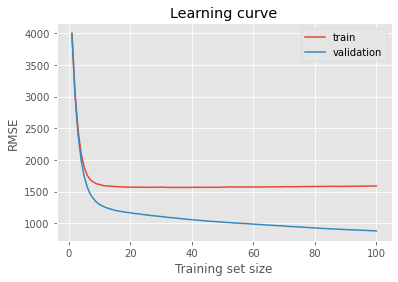

In [153]:
train_errors = []
val_errors = []

# Loop over the sizes of the training set
for i in range(1,101):
    # Concatenate the models' evaluation results from the first i folds
    train_evals = [models[j].evals_result()['validation_0']['rmse'][:i] for j in range(len(models))]
    val_evals = [models[j].evals_result()['validation_1']['rmse'][:i] for j in range(len(models))]
    
    # Compute the mean and standard deviation of the evaluation results at each training set size
    train_mean = np.mean(train_evals, axis=0)
    train_std = np.std(train_evals, axis=0)
    val_mean = np.mean(val_evals, axis=0)
    val_std = np.std(val_evals, axis=0)
    
    # Append the mean errors to the lists
    train_errors.append(train_mean[-1])
    val_errors.append(val_mean[-1])
    
# Plot the learning curve
plt.plot(range(1, 101), train_errors, label='train')
plt.plot(range(1, 101), val_errors, label='validation')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning curve')
plt.legend()
plt.show()





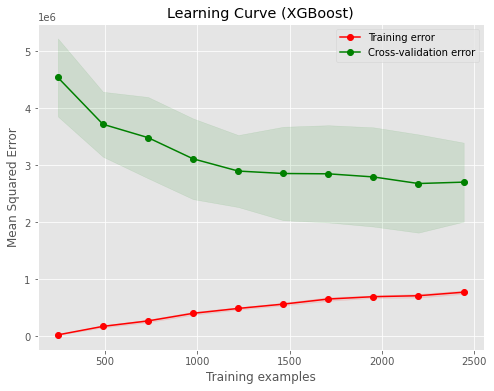

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_mean - valid_std,
                 valid_mean + valid_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r",
         label="Training error")
plt.plot(train_sizes, valid_mean, 'o-', color="g",
         label="Cross-validation error")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.title("Learning Curve (XGBoost)")
plt.show()

In [124]:
user_id = test["ID"]

model_preds = [model.predict(app_test_encode) for model in models]
model_preds

[array([2567.972 , 3265.8784, 7845.9946, ..., 3764.2732, 3845.3706,
        4840.6665], dtype=float32),
 array([2646.9214, 3108.9622, 7862.5884, ..., 4135.0137, 3211.9858,
        4673.2246], dtype=float32),
 array([2662.041 , 3237.631 , 7803.472 , ..., 4352.01  , 3778.3623,
        4676.0176], dtype=float32),
 array([2621.805 , 3177.0447, 8325.704 , ..., 3877.239 , 3312.9062,
        5763.7603], dtype=float32),
 array([2624.157 , 3177.3396, 7888.917 , ..., 3713.1711, 3778.842 ,
        5295.9146], dtype=float32),
 array([2550.0999, 3318.1467, 7520.373 , ..., 4110.8545, 3450.8867,
        4828.8965], dtype=float32),
 array([2478.3533, 3488.6606, 8006.3804, ..., 3737.5125, 3631.7598,
        4912.47  ], dtype=float32),
 array([2514.8643, 3396.2263, 8208.3   , ..., 4222.9644, 3681.844 ,
        4628.183 ], dtype=float32),
 array([2570.0974, 3313.8396, 7910.8203, ..., 4014.9578, 3742.9836,
        4910.3247], dtype=float32),
 array([2582.2131, 3166.2212, 7559.4487, ..., 3071.5066, 3543.17

In [125]:
sample_submission = pd.DataFrame()
sample_submission['ID'] = user_id
sample_submission['ElapsedTime(second)'] = np.round(np.mean(model_preds,axis=0)).astype(int)

In [126]:
sample_submission.head()

,ID,ElapsedTime(second)
0,1669,2582
1,2091,3265
2,585,7893
3,1455,7824
4,1801,2302


In [ ]:
sample_submission.head()

,ID,ElapsedTime(second)
0,1669,2298
1,2091,3143
2,585,7497
3,1455,7257
4,1801,2445


In [ ]:
sample_submission.shape

(1211, 2)

In [ ]:
sample_submission.to_csv("sample_submission.csv", index = False)